<a href="https://colab.research.google.com/github/firarru/ML-Manual-Naive-Bayes/blob/uts/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# **Dataset**

In [2]:
df_train = pd.read_excel("https://raw.githubusercontent.com/firarru/ML-Manual-Naive-Bayes/uts/Dataset/train_data.xlsx")
df_train.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Status BMI
0,Female,21,1.61,68.11,yes,yes,1.98,3.55,no,no,2.22,no,0.98,0.460,Sometimes,Public_Transportation,Overweight_Level_I
1,Female,19,1.63,77.86,yes,no,2.70,3.00,Sometimes,no,2.47,no,1.86,1.000,Sometimes,Public_Transportation,Overweight_Level_II
2,Female,22,1.61,82.47,yes,yes,1.56,1.00,Sometimes,no,2.37,no,0.29,2.000,Sometimes,Public_Transportation,Obesity_Type_I
3,Female,26,1.61,107.01,yes,yes,3.00,3.00,Sometimes,no,2.68,no,0.00,0.509,Sometimes,Public_Transportation,Obesity_Type_III
4,Female,44,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I


In [3]:
df_test = pd.read_excel("https://raw.githubusercontent.com/firarru/ML-Manual-Naive-Bayes/uts/Dataset/test_data.xlsx")
df_test.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi
0,Male,21,1.69,99.53,yes,yes,2.0,1.67,Sometimes,no,2.00,no,0.00,1.946,no,Public_Transportation
1,Male,23,1.74,93.50,no,yes,2.0,3.00,Frequently,yes,1.00,no,1.00,1.000,Frequently,Automobile
2,Female,22,1.75,133.85,yes,yes,3.0,3.00,Sometimes,no,2.75,no,1.43,0.903,Sometimes,Public_Transportation
3,Female,22,1.59,44.01,no,no,3.0,1.61,Frequently,no,2.57,no,1.19,0.000,no,Public_Transportation
4,Male,18,1.78,108.04,yes,yes,2.0,2.66,Sometimes,no,2.30,no,1.00,0.553,no,Public_Transportation


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1679 non-null   object 
 1   Umur                       1679 non-null   int64  
 2   Tinggi Badan (m)           1679 non-null   float64
 3   Berat Badan (kg)           1679 non-null   float64
 4   Riwayat Keluarga Obesitas  1679 non-null   object 
 5   FAVC                       1679 non-null   object 
 6   FCVC                       1679 non-null   float64
 7   NCP                        1679 non-null   float64
 8   CAEC                       1679 non-null   object 
 9   Merokok                    1679 non-null   object 
 10  CH2O                       1679 non-null   float64
 11  SCC                        1679 non-null   object 
 12  FAF                        1679 non-null   float64
 13  TUE                        1679 non-null   float

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              420 non-null    object 
 1   Umur                       420 non-null    int64  
 2   Tinggi Badan (m)           420 non-null    float64
 3   Berat Badan (kg)           420 non-null    float64
 4   Riwayat Keluarga Obesitas  420 non-null    object 
 5   FAVC                       420 non-null    object 
 6   FCVC                       420 non-null    float64
 7   NCP                        420 non-null    float64
 8   CAEC                       420 non-null    object 
 9   Merokok                    420 non-null    object 
 10  CH2O                       420 non-null    float64
 11  SCC                        420 non-null    object 
 12  FAF                        420 non-null    float64
 13  TUE                        420 non-null    float64

# **Pre Proses**

In [6]:
df_train[df_train.duplicated()]

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Status BMI
132,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
189,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
497,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
603,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
966,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
987,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
1029,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
1032,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
1107,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
1152,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


In [7]:
df_train = df_train.fillna(df_train.mode())

In [8]:
df_train.shape

(1679, 17)

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,1679.0,24.278142,6.417307,14.00,20.000,23.000,26.000,61.00
Tinggi Badan (m),1679.0,1.701191,0.094282,1.45,1.630,1.700,1.770,1.98
Berat Badan (kg),1679.0,86.119923,26.006783,39.00,65.000,82.530,106.045,173.00
FCVC,1679.0,2.410357,0.535666,1.00,2.000,2.340,3.000,3.00
NCP,1679.0,2.689833,0.781395,1.00,2.655,3.000,3.000,4.00
CH2O,1679.0,2.009053,0.613975,1.00,1.575,2.000,2.480,3.00
FAF,1679.0,1.011965,0.849282,0.00,0.130,1.000,1.670,3.00
TUE,1679.0,0.661108,0.611017,0.00,0.000,0.625,1.000,2.00


# **EDA**

In [10]:
cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
cat_num = [col for col in df_train.columns if df_train[col].dtype != 'object']

In [11]:
for col in cat_cols:
    print(df_train[col].value_counts())
    print()

Jenis Kelamin
Male      871
Female    808
Name: count, dtype: int64

Riwayat Keluarga Obesitas
yes    1376
no      303
Name: count, dtype: int64

FAVC
yes    1479
no      200
Name: count, dtype: int64

CAEC
Sometimes     1397
Frequently     194
no              44
Always          44
Name: count, dtype: int64

Merokok
no     1649
yes      30
Name: count, dtype: int64

SCC
no     1602
yes      77
Name: count, dtype: int64

CALC
Sometimes     1114
no             514
Frequently      49
Sometim          1
Always           1
Name: count, dtype: int64

Aktifitas Transportasi
Public_Transportation    1253
Automobile                368
Walking                    42
Motorbike                  11
Bike                        4
Name: count, dtype: int64

Status BMI
Obesity_Type_I         281
Obesity_Type_III       243
Obesity_Type_II        241
Overweight_Level_II    235
Normal_Weight          231
Overweight_Level_I     226
Insufficient_Weight    221
Name: count, dtype: int64



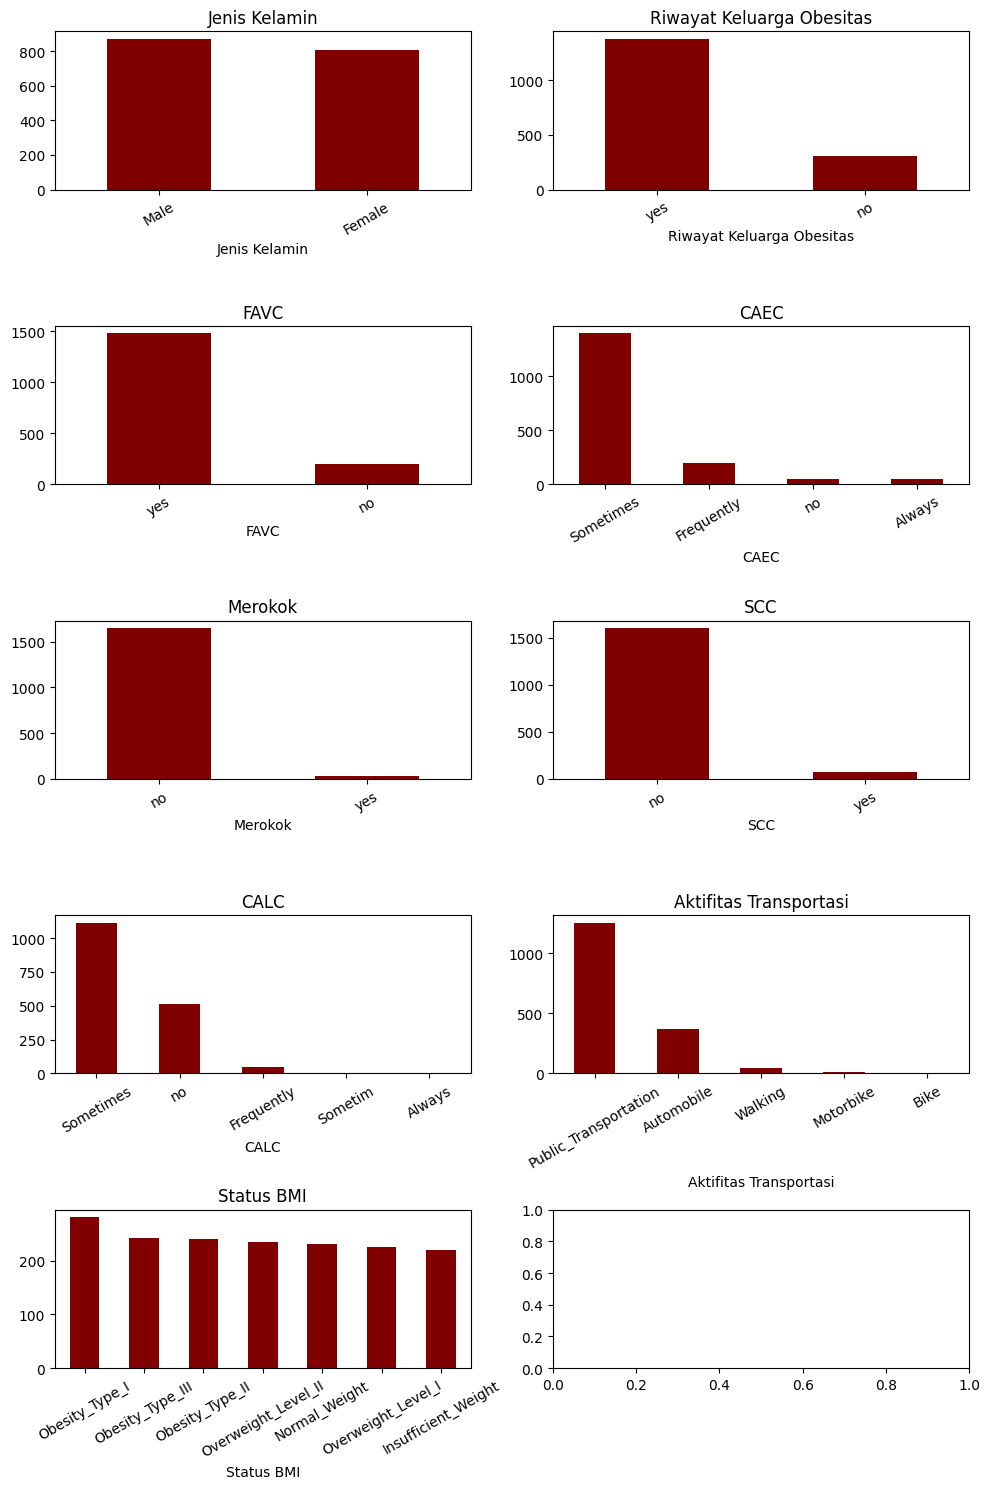

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    df_train[col].value_counts().plot(kind='bar', ax=axs[i], color='maroon')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

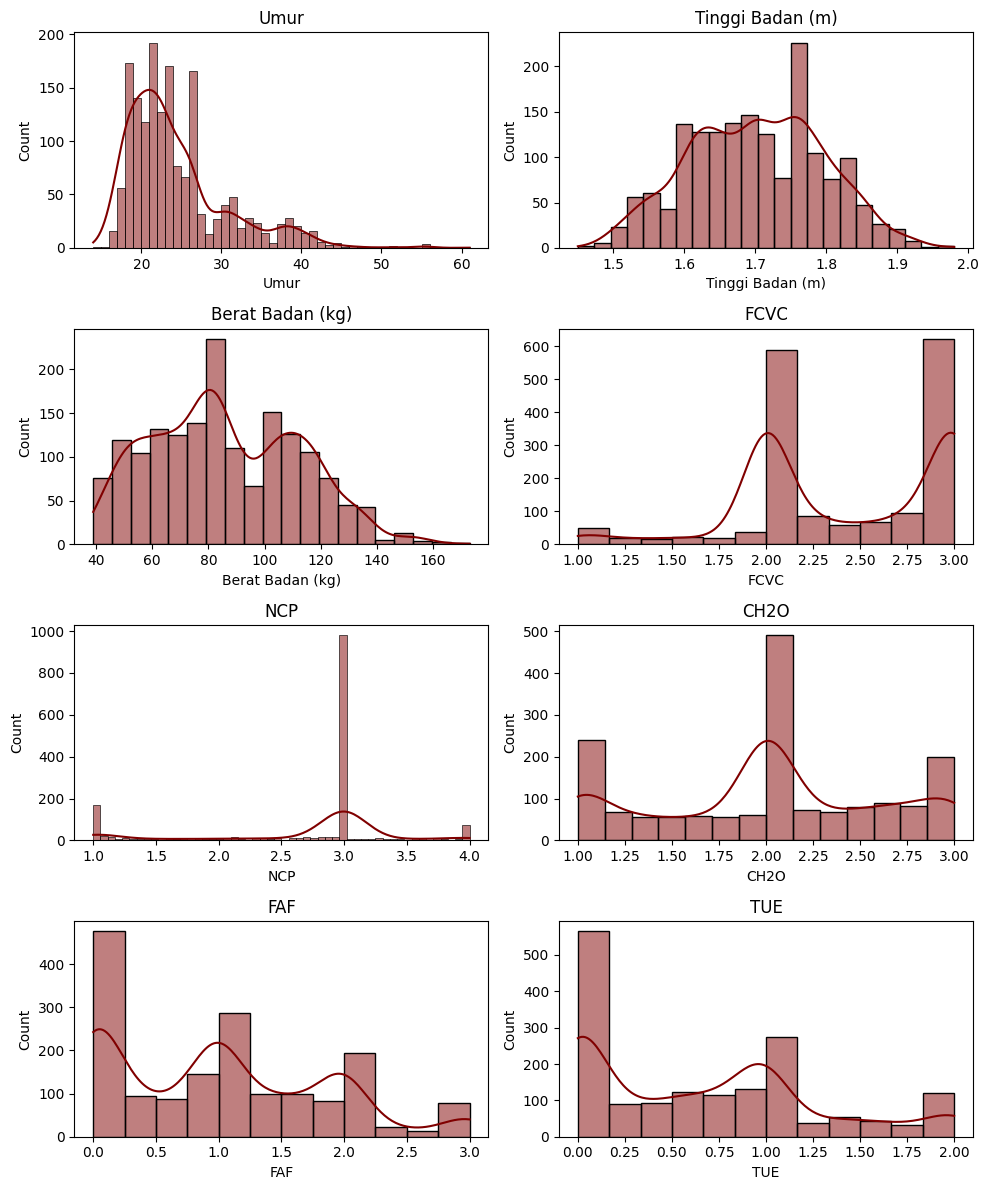

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axs = axs.flatten()

for i, col in enumerate(cat_num):
    sns.histplot(data=df_train, x=col, kde=True, ax=axs[i], color='maroon')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

In [14]:
X_train = df_train.loc[:, df_train.columns != 'Status BMI']
y_train = df_train['Status BMI']

In [15]:
y_train.value_counts()

,count
Status BMI,
Obesity_Type_I,281
Obesity_Type_III,243
Obesity_Type_II,241
Overweight_Level_II,235
Normal_Weight,231
Overweight_Level_I,226
Insufficient_Weight,221


# **Transformasi**

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = {}
for col in cat_cols:
  if col in X_train.columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoder[col] = le

    if col in df_test.columns:
      df_test[col] = le.transform(df_test[col])

target_col = 'Status BMI'
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(df_train[target_col])

<ipython-input-16-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-16-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-16-05438f25cc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
df_test_scaled = scaler.transform(df_test)

In [18]:
print(X_train_scaled.shape)
print(df_test_scaled.shape)

(1679, 16)
(420, 16)


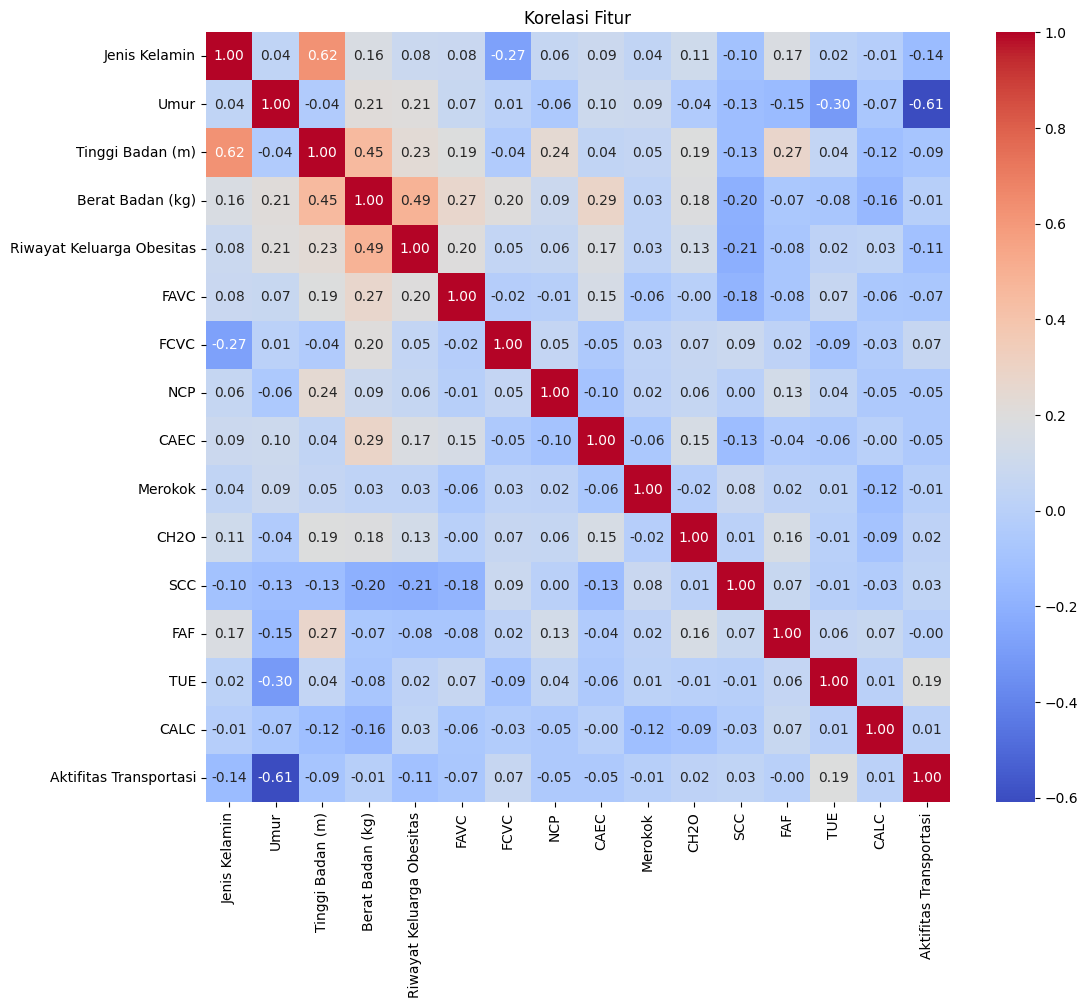

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur')
plt.show()

# **Model Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
modelnb = GaussianNB()
modelnb.fit(X_train_scaled, y_train)
y_pred_nb = modelnb.predict(df_test_scaled)

In [22]:
nb_accuracy = accuracy_score(y_train, modelnb.predict(X_train_scaled))
print("Training Accuracy:", nb_accuracy)

Training Accuracy: 0.5610482430017868


In [23]:
df_nb_pred = df_test.copy()
df_nb_label = target_encoder.inverse_transform(y_pred_nb)
df_nb_pred['Predicted Status BMI'] = df_nb_label
df_nb_pred.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Predicted Status BMI
0,1,21,1.69,99.53,1,1,2.0,1.67,2,0,2.00,0,0.00,1.946,4,3,Obesity_Type_I
1,1,23,1.74,93.50,0,1,2.0,3.00,1,1,1.00,0,1.00,1.000,1,0,Normal_Weight
2,0,22,1.75,133.85,1,1,3.0,3.00,2,0,2.75,0,1.43,0.903,3,3,Obesity_Type_III
3,0,22,1.59,44.01,0,0,3.0,1.61,1,0,2.57,0,1.19,0.000,4,3,Insufficient_Weight
4,1,18,1.78,108.04,1,1,2.0,2.66,2,0,2.30,0,1.00,0.553,4,3,Obesity_Type_II


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_classifier = GaussianNB()

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Hyperparameters: {'var_smoothing': np.float64(0.04328761281083057)}


In [25]:
best_nb_model = grid_search.best_estimator_
y_pred_nb = best_nb_model.predict(df_test_scaled)

In [26]:
df_nb_pred = df_test.copy()
df_nb_label = target_encoder.inverse_transform(y_pred_nb)
df_nb_pred['Predicted Status BMI'] = df_nb_label
df_nb_pred.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Predicted Status BMI
0,1,21,1.69,99.53,1,1,2.0,1.67,2,0,2.00,0,0.00,1.946,4,3,Obesity_Type_I
1,1,23,1.74,93.50,0,1,2.0,3.00,1,1,1.00,0,1.00,1.000,1,0,Normal_Weight
2,0,22,1.75,133.85,1,1,3.0,3.00,2,0,2.75,0,1.43,0.903,3,3,Obesity_Type_III
3,0,22,1.59,44.01,0,0,3.0,1.61,1,0,2.57,0,1.19,0.000,4,3,Insufficient_Weight
4,1,18,1.78,108.04,1,1,2.0,2.66,2,0,2.30,0,1.00,0.553,4,3,Obesity_Type_II


In [27]:
print("Best Accuracy:", grid_search.best_score_)

Best Accuracy: 0.6098862828713575


# **Decission Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(df_test_scaled)

In [35]:
dt_accuracy = accuracy_score(y_train, dt_model.predict(X_train_scaled))
print("Accuracy:", dt_accuracy)

Accuracy: 1.0


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.94345238 0.92857143 0.9375     0.91964286 0.94626866]


In [31]:
param_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_classifier = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search_dt.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [32]:
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(df_test_scaled)

In [33]:
df_dt_pred = df_test.copy()
df_dt_label = target_encoder.inverse_transform(y_pred_dt)
df_dt_pred['Predicted Status BMI'] = df_dt_label
df_dt_pred.head()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Predicted Status BMI
0,1,21,1.69,99.53,1,1,2.0,1.67,2,0,2.00,0,0.00,1.946,4,3,Obesity_Type_I
1,1,23,1.74,93.50,0,1,2.0,3.00,1,1,1.00,0,1.00,1.000,1,0,Obesity_Type_I
2,0,22,1.75,133.85,1,1,3.0,3.00,2,0,2.75,0,1.43,0.903,3,3,Obesity_Type_III
3,0,22,1.59,44.01,0,0,3.0,1.61,1,0,2.57,0,1.19,0.000,4,3,Insufficient_Weight
4,1,18,1.78,108.04,1,1,2.0,2.66,2,0,2.30,0,1.00,0.553,4,3,Obesity_Type_I


In [34]:
print(f'Accuracy: {grid_search_dt.best_score_}')

Accuracy: 0.9499609097370293


In [36]:
# df_dt_pred.to_excel('Hasil_Prediksi_Decision_Tree.xlsx', index=False)